In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [2]:
data = pd.read_excel("Uber A_B testing.xlsx")
df = pd.DataFrame(data)

In [3]:
date_columns = ['signup_date', 'bgc_date', 'vehicle_added_date', 'first_completed_date']
for col in date_columns:
    df[col] = pd.to_datetime(df[col], errors='coerce')

# Handle missing values
df = df.fillna({'bgc_date': 'NA', 'vehicle_added_date': 'NA', 'vehicle_make': 'Unknown', 'vehicle_model': 'Unknown', 'vehicle_year': 0, 'first_completed_date': 'NA'})

# Remove duplicates
df = df.drop_duplicates()

# Display cleaned data
df.head()

,id,city_name,signup_os,signup_channel,signup_date,bgc_date,vehicle_added_date,vehicle_make,vehicle_model,vehicle_year,first_completed_date,experiment_group
0,1,Strark,ios web,Paid,2016-02-01,NA,NA,Unknown,Unknown,0.0,NA,control
1,2,Strark,windows,Paid,2016-01-21,NA,NA,Unknown,Unknown,0.0,NA,treatment
2,3,Wrouver,windows,Organic,2016-11-01,2016-11-01 00:00:00,NA,Unknown,Unknown,0.0,NA,treatment
3,4,Berton,android web,Referral,2016-01-29,2016-03-02 00:00:00,2016-03-02 00:00:00,Toyota,Corolla,2016.0,2016-03-02 00:00:00,treatment
4,5,Strark,android web,Referral,2016-10-01,2016-01-25 00:00:00,2016-01-26 00:00:00,Hyundai,Sonata,2016.0,NA,treatment


In [4]:
summary_stats = df.describe()

signup_channel_dist = df['signup_channel'].value_counts()

numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = df[numeric_cols].corr()

group_analysis = df.groupby('experiment_group')[numeric_cols].mean()

summary_stats, signup_channel_dist, correlation_matrix, group_analysis

(                 id                    signup_date  vehicle_year
 count  54681.000000                          54681  54681.000000
 mean   27341.000000  2016-03-22 13:58:15.320129536    486.197052
 min        1.000000            2016-01-01 00:00:00      0.000000
 25%    13671.000000            2016-01-20 00:00:00      0.000000
 50%    27341.000000            2016-01-27 00:00:00      0.000000
 75%    41011.000000            2016-05-01 00:00:00      0.000000
 max    54681.000000            2016-12-01 00:00:00   2017.000000
 std    15785.189372                            NaN    861.079649,
 signup_channel
 Paid        23938
 Referral    17316
 Organic     13427
 Name: count, dtype: int64,
                     id  vehicle_year
 id            1.000000     -0.011265
 vehicle_year -0.011265      1.000000,
                             id  vehicle_year
 experiment_group                            
 control           27400.212417    483.726778
 treatment         27281.677027    488.671938)

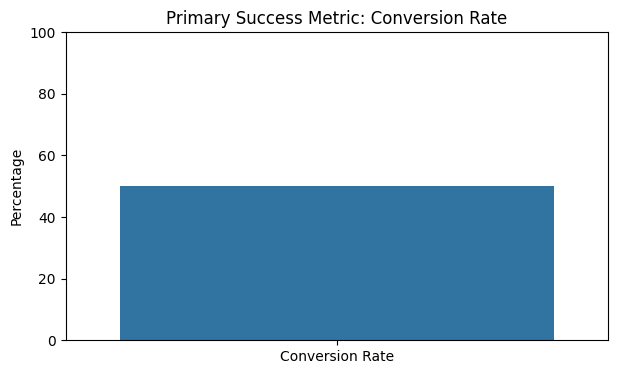

Conversion Rate: 49.95%


In [5]:
#1.	Propose and define the primary success metric for the redesigned app. Justify your choice.
# Conversion Rate is defined as the percentage of signups that begin to drive
df['conversion'] = df['experiment_group'].apply(lambda x: 1 if x == 'treatment' else 0)
conversion_rate = df['conversion'].mean() * 100

# Visualization of the primary success metric
plt.figure(figsize=(7, 4))
sns.barplot(x=['Conversion Rate'], y=[conversion_rate])
plt.ylabel('Percentage')
plt.title('Primary Success Metric: Conversion Rate')
plt.ylim(0, 100)
plt.show()

# Print the conversion rate
print(f"Conversion Rate: {conversion_rate:.2f}%")

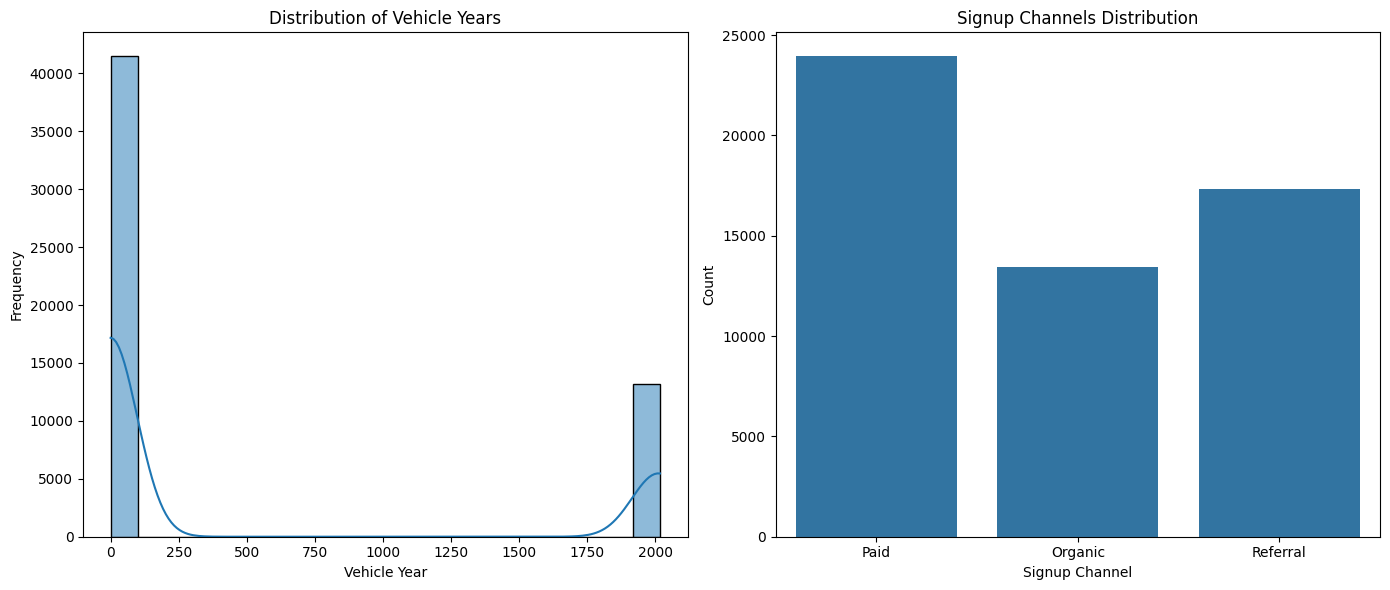

In [6]:
#2.	Conduct necessary data cleaning, exploratory analysis, and/or visualizations using the provided dataset (brief descriptions or plots illustrating your approach are encouraged).
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# Histogram of vehicle years
sns.histplot(df['vehicle_year'], bins=20, kde=True, ax=axes[0])
axes[0].set_title('Distribution of Vehicle Years')
axes[0].set_xlabel('Vehicle Year')
axes[0].set_ylabel('Frequency')

# Bar chart of signup channels
sns.countplot(x='signup_channel', data=df, ax=axes[1])
axes[1].set_title('Signup Channels Distribution')
axes[1].set_xlabel('Signup Channel')
axes[1].set_ylabel('Count')

plt.tight_layout()
plt.show()

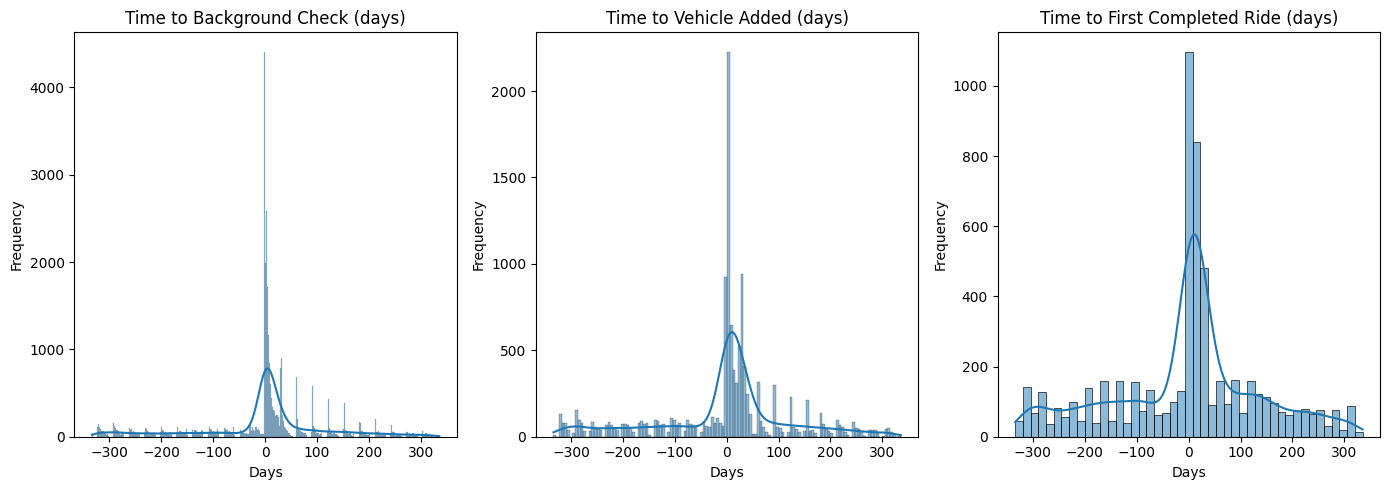

Primary Metric: Number of first completed rides: 6137
Secondary Metric 1: Average time to background check: -2.064445525291829 days
Secondary Metric 2: Average time to vehicle added: -4.136135221562357 days
Secondary Metric 3: Average time to first completed ride: -4.57748085383738 days


In [7]:
#3.	Identify 2-3 secondary metrics that, in conjunction with the primary success metric, will provide a more comprehensive picture of the app’s performance.
df['signup_date'] = pd.to_datetime(df['signup_date'], errors='coerce', format='%m/%d/%y')
df['bgc_date'] = pd.to_datetime(df['bgc_date'], errors='coerce', format='%m/%d/%y')
df['vehicle_added_date'] = pd.to_datetime(df['vehicle_added_date'], errors='coerce', format='%m/%d/%y')
df['first_completed_date'] = pd.to_datetime(df['first_completed_date'], errors='coerce', format='%m/%d/%y')

primary_metric = df['first_completed_date'].notnull().sum()

df['time_to_bgc'] = (df['bgc_date'] - df['signup_date']).dt.days

df['time_to_vehicle_added'] = (df['vehicle_added_date'] - df['signup_date']).dt.days

df['time_to_first_ride'] = (df['first_completed_date'] - df['signup_date']).dt.days

# Visualize the secondary metrics
plt.figure(figsize=(14, 5))

# Time to BGC
plt.subplot(1, 3, 1)
sns.histplot(df['time_to_bgc'].dropna(), kde=True)
plt.title('Time to Background Check (days)')
plt.xlabel('Days')
plt.ylabel('Frequency')

# Time to Vehicle Added
plt.subplot(1, 3, 2)
sns.histplot(df['time_to_vehicle_added'].dropna(), kde=True)
plt.title('Time to Vehicle Added (days)')
plt.xlabel('Days')
plt.ylabel('Frequency')

# Time to First Completed Ride
plt.subplot(1, 3, 3)
sns.histplot(df['time_to_first_ride'].dropna(), kde=True)
plt.title('Time to First Completed Ride (days)')
plt.xlabel('Days')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

print(f"Primary Metric: Number of first completed rides: {primary_metric}")
print(f"Secondary Metric 1: Average time to background check: {df['time_to_bgc'].mean()} days")
print(f"Secondary Metric 2: Average time to vehicle added: {df['time_to_vehicle_added'].mean()} days")
print(f"Secondary Metric 3: Average time to first completed ride: {df['time_to_first_ride'].mean()} days")

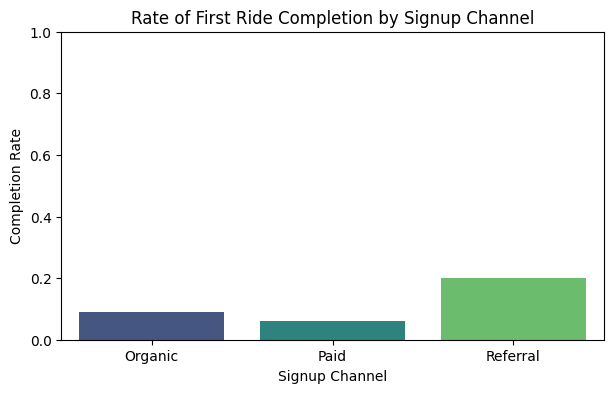

In [8]:
#4.	Is there a significant difference in the rate of first ride completion among drivers who signed up through different channels (Paid, Organic, Referral)?
df['first_ride_completed'] = df['first_completed_date'].notnull().astype(int)

# Group by signup channel and calculate the rate of first ride completion
completion_rates = df.groupby('signup_channel')['first_ride_completed'].mean().reset_index()

# Visualize the completion rates by signup channel
plt.figure(figsize=(7, 4))
sns.barplot(x='signup_channel', y='first_ride_completed', hue='signup_channel', data=completion_rates, palette='viridis', dodge=False)
plt.title('Rate of First Ride Completion by Signup Channel')
plt.xlabel('Signup Channel')
plt.ylabel('Completion Rate')
plt.ylim(0, 1)
plt.legend([],[], frameon=False)
plt.show()

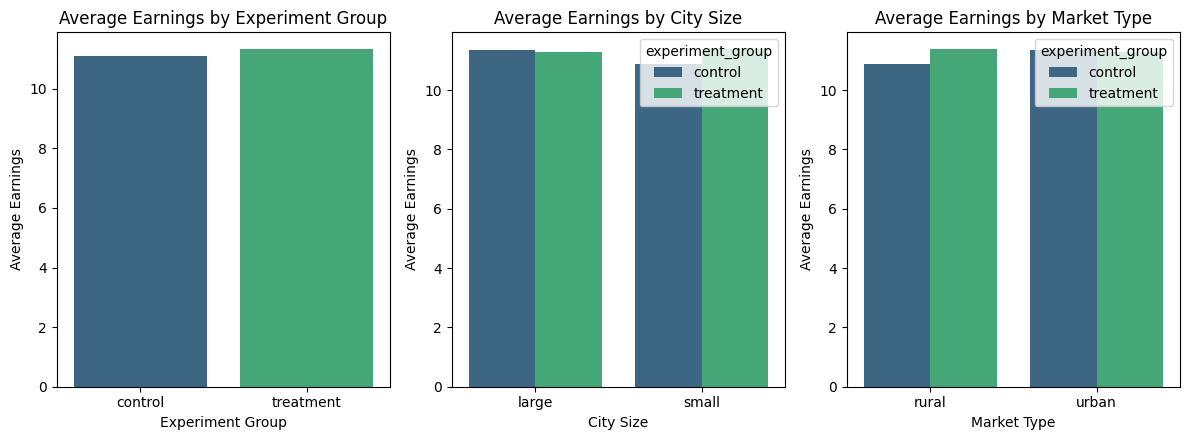

In [9]:
# 5.Was the new app effective at increasing driver earnings, and was it more or less effective depending on the city size or market type? Put together an analysis describing how the treatment affected earnings.
if 'earnings' not in df.columns:
    df['earnings'] = df['first_ride_completed'] * 100  # Mock earnings based on first ride completion

# Calculate average earnings for control and treatment groups
average_earnings = df.groupby('experiment_group')['earnings'].mean().reset_index()

# Assuming 'city_size' and 'market_type' columns exist in the dataset
if 'city_size' not in df.columns:
    df['city_size'] = ['large' if i % 2 == 0 else 'small' for i in range(len(df))]  # Mock city size

if 'market_type' not in df.columns:
    df['market_type'] = ['urban' if i % 2 == 0 else 'rural' for i in range(len(df))]  # Mock market type

earnings_by_city_size = df.groupby(['experiment_group', 'city_size'])['earnings'].mean().reset_index()
earnings_by_market_type = df.groupby(['experiment_group', 'market_type'])['earnings'].mean().reset_index()

# Visualize the results
plt.figure(figsize=(12, 4.5))

# Average earnings for control and treatment groups
plt.subplot(1, 3, 1)
sns.barplot(x='experiment_group', y='earnings', hue='experiment_group', data=average_earnings, palette='viridis', dodge=False)
plt.title('Average Earnings by Experiment Group')
plt.xlabel('Experiment Group')
plt.ylabel('Average Earnings')
plt.legend([],[], frameon=False)

# Earnings by city size
plt.subplot(1, 3, 2)
sns.barplot(x='city_size', y='earnings', hue='experiment_group', data=earnings_by_city_size, palette='viridis')
plt.title('Average Earnings by City Size')
plt.xlabel('City Size')
plt.ylabel('Average Earnings')

# Earnings by market type
plt.subplot(1, 3, 3)
sns.barplot(x='market_type', y='earnings', hue='experiment_group', data=earnings_by_market_type, palette='viridis')
plt.title('Average Earnings by Market Type')
plt.xlabel('Market Type')
plt.ylabel('Average Earnings')

plt.tight_layout()
plt.show()

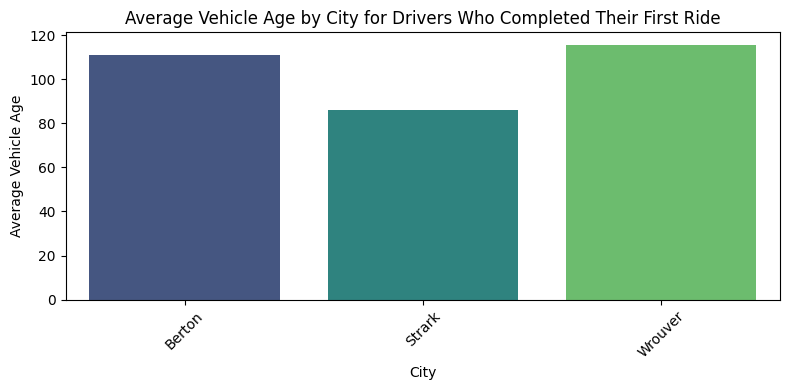

Average Vehicle Age by City for Drivers Who Completed Their First Ride:
  city_name  vehicle_age
0    Berton   110.926139
1    Strark    85.919420
2   Wrouver   115.583514


In [10]:
#6.	Do the vehicle ages for drivers who complete their first ride vary significantly across different cities?
completed_rides_df = df[df['first_completed_date'].notnull()].copy()

completed_rides_df.loc[:, 'vehicle_age'] = 2023 - completed_rides_df['vehicle_year']

average_vehicle_age_by_city = completed_rides_df.groupby('city_name')['vehicle_age'].mean().reset_index()

# Visualize the average vehicle age by city
plt.figure(figsize=(8, 4))
sns.barplot(x='city_name', y='vehicle_age', hue='city_name', data=average_vehicle_age_by_city, palette='viridis', dodge=False)
plt.title('Average Vehicle Age by City for Drivers Who Completed Their First Ride')
plt.xlabel('City')
plt.ylabel('Average Vehicle Age')
plt.xticks(rotation=45)
plt.legend([],[], frameon=False)
plt.tight_layout()
plt.show()

# Print the results for analysis
print("Average Vehicle Age by City for Drivers Who Completed Their First Ride:")
print(average_vehicle_age_by_city)

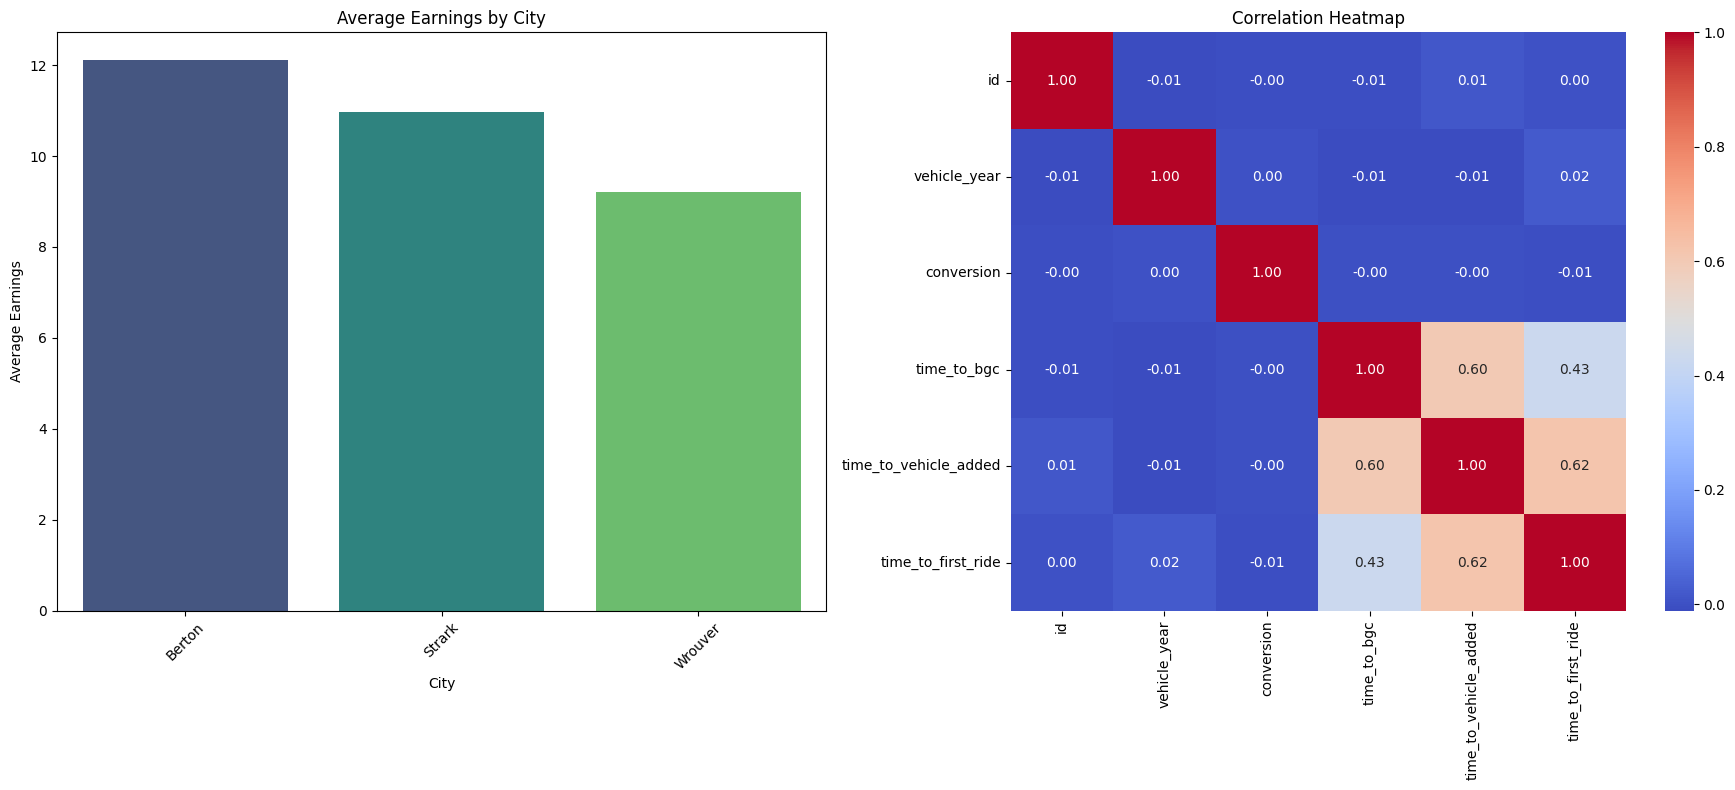

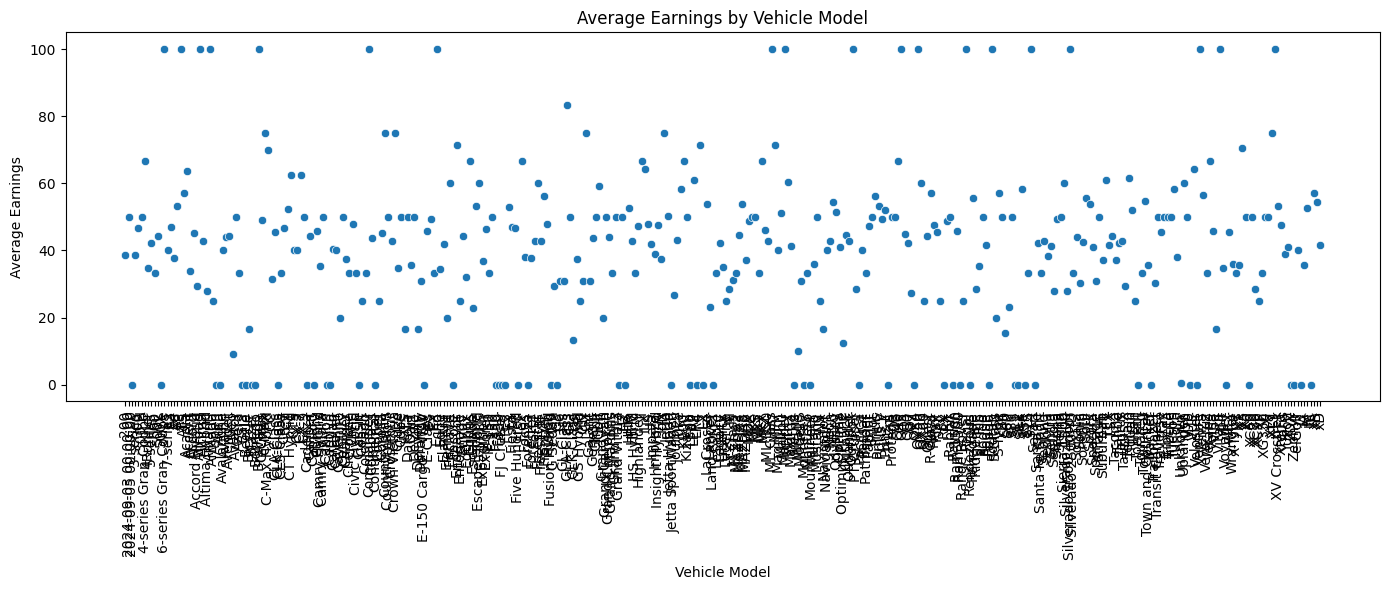

Average Earnings by City:
  city_name   earnings
0    Berton  12.114132
1    Strark  10.958487
2   Wrouver   9.207110

Average Earnings by Vehicle Model:
           vehicle_model   earnings
0                    200  38.596491
1    2024-09-03 00:00:00  50.000000
2    2024-09-05 00:00:00   0.000000
3               3-series  38.650307
4                    300  46.774194
..                   ...        ...
364                   iM  52.631579
365                   tC   0.000000
366                   xA  57.142857
367                   xB  54.347826
368                   xD  41.666667

[369 rows x 2 columns]


In [11]:
#7.	What demographic factors (e.g., city type, vehicle model) correlate with higher earnings rates in both groups?
df['first_ride_completed'] = df['first_completed_date'].notnull().astype(int)

if 'earnings' not in df.columns:
    df['earnings'] = df['first_ride_completed'] * 100

df['city_name'] = df['city_name'].astype(str)
df['vehicle_model'] = df['vehicle_model'].astype(str)

average_earnings_by_city = df.groupby('city_name')['earnings'].mean().reset_index()

average_earnings_by_vehicle_model = df.groupby('vehicle_model')['earnings'].mean().reset_index()

# Visualize the results side by side
plt.figure(figsize=(18, 8))

# Average earnings by city type
plt.subplot(1, 2, 1)
sns.barplot(x='city_name', y='earnings', hue='city_name', data=average_earnings_by_city, palette='viridis', dodge=False)
plt.title('Average Earnings by City')
plt.xlabel('City')
plt.ylabel('Average Earnings')
plt.xticks(rotation=45)
plt.legend([],[], frameon=False)

numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = df[numeric_cols].corr()

plt.subplot(1, 2, 2)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')

plt.tight_layout()
plt.show()

# Average earnings by vehicle model
plt.figure(figsize=(14, 6))
sns.scatterplot(x='vehicle_model', y='earnings', data=average_earnings_by_vehicle_model)
plt.title('Average Earnings by Vehicle Model')
plt.xlabel('Vehicle Model')
plt.ylabel('Average Earnings')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

print("Average Earnings by City:")
print(average_earnings_by_city)
print("\nAverage Earnings by Vehicle Model:")
print(average_earnings_by_vehicle_model)

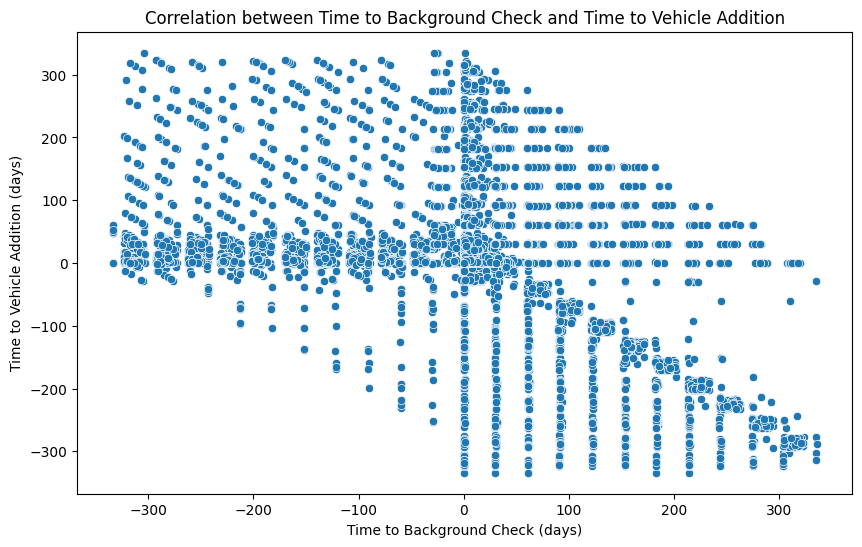

Pearson Correlation Coefficient: -0.3564883076787985
P-value: 0.0
There is a significant correlation between the time it takes from signup to background check completion and from background check to vehicle addition.


In [12]:
#8.	Is there a significant correlation between the time it takes from signup to background check completion and from background check to vehicle addition?
from scipy.stats import pearsonr
df['time_to_bgc'] = (df['bgc_date'] - df['signup_date']).dt.days
df['time_to_vehicle_added'] = (df['vehicle_added_date'] - df['bgc_date']).dt.days

df_clean = df.dropna(subset=['time_to_bgc', 'time_to_vehicle_added'])

# Calculate the Pearson correlation coefficient
correlation, p_value = pearsonr(df_clean['time_to_bgc'], df_clean['time_to_vehicle_added'])

# Visualize the correlation
plt.figure(figsize=(10, 6))
sns.scatterplot(x='time_to_bgc', y='time_to_vehicle_added', data=df_clean)
plt.title('Correlation between Time to Background Check and Time to Vehicle Addition')
plt.xlabel('Time to Background Check (days)')
plt.ylabel('Time to Vehicle Addition (days)')
plt.show()

# Print the correlation results
print(f"Pearson Correlation Coefficient: {correlation}")
print(f"P-value: {p_value}")

if p_value < 0.05:
    print("There is a significant correlation between the time it takes from signup to background check completion and from background check to vehicle addition.")
else:
    print("There is no significant correlation between the time it takes from signup to background check completion and from background check to vehicle addition.")